# Grid Search

_By Jeff Hale_

---

## Learning Objectives
By the end of this lesson students will be able to:

- Understand what grid searching is
- Use `GridSearchCV` class from sklearn to find optimal hyperparameters
- Differentiate `cross_val_score` from `GridSearchCV`

---

## GridSearch CV
GridSearchCV is nifty sklearn class. 😀 

It performs cross validation, shuffles the data by default, and searches over a bunch of parameters.

It replaces the old way of using a `for` loop with `cross_val_score`. 

Using GridSearchCV is the best way to optimize hyperparameters.

## Hyperparameters vs parameters.

Definition 1 of `parameters`: the things a function accepts. When you pass them to a function they are called `arguments`. This distinction is commonly misused.

Definition 2 of `parameters`: the weights in a model. For example, the $ \beta $ values in a linear regression equation.

`hyperparameters` are the arguments you choose for a model that can have different values. You tune these to improve model performance. For example the most important hyperparameter for a KNN model is `n_neighbors` (the number of nearest neighbors to include in the model). 


### Just remember: YOU choose the hyperparameters.

In [25]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


In [26]:
# read in the data
boston = pd.read_csv('../data/boston_data.csv')

In [27]:
# inspect 
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [28]:
# break into X and y
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

In [29]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


In [30]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [31]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

## GridSearch Syntax

`GridSearch` accepts an sklearn `estimator` object and a parameter grid.

The param grid is a dictionary. The key is the name of the hyperparameter argument in sklearn.  

The value is an iterable to search over (generally a list or a range-style object).

What's an iterable? Something Python can iterate over. 😀

Let's use GridSearch with a Lasso model and different values for alpha.

In [32]:
# set up a param grid with the following:
#     alpha: [.1, .5, 1, 1.5, 2]

In [33]:
params = {
    'alpha': [.5, 1]
}

You can also specify the number of folds using `cv`. Default is 5.

In [34]:
# instantiate our gridsearch object
gs = GridSearchCV(Lasso(), param_grid=params, verbose=1)

We use this the same as other models, `fit`ting and `score`ing like normal (but now using the hyperparameters that gave us the best results).

In [35]:
# fit on the training data
gs.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'alpha': [0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [36]:
# score the training data
gs.score(X_train, y_train)

0.7293485004831489

In [37]:
# score the test data
gs.score(X_test, y_test)

0.6447960305840518

So what are our best parameters?

In [38]:
# look at `.best_params_`
gs.best_params_

{'alpha': 0.5}

Note that we'll use our `best_estimator_` to access the model that was fit with our `best_params_`.

Call `best_estimator_` to see all the values in the best-performing model.

In [39]:
gs.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

This is a simple scatter plot to compare our true values to our predictions to visualize our errors.

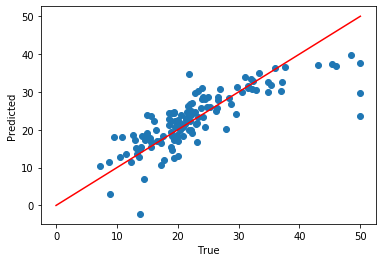

In [42]:
plt.scatter(y_test, gs.predict(X_test))
plt.ylabel('Predicted')
plt.xlabel('True')
plt.plot([0, 50], [0, 50], color='r')


# Summary

You've seen `GridSearchCV`

## Check for understanding

- Why would you want to use `GridSearchCV`?
- What do you pass `GridSearchCV`?
- How do you specify the parameter grid?
- Does `GridSearchCV` randomize the data for cross validation?

`GridSearchCV` is an extremely powerful tool for your toolkit! 🛠
